In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
files = [file for file in os.listdir('.') if file.endswith('.csv')]

df = pd.read_csv(files[0])

for file in files[1:]:
    df = pd.concat([df, pd.read_csv(file)], ignore_index=True)

In [3]:
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [5]:
df.drop(df[df['Order Date'] == 'Order Date'].index, inplace=True)

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

In [7]:
df['Price Each'] = df['Price Each'].astype(float)

In [8]:
df['Purchase Address'].str.split(',')

0                    [917 1st St,  Dallas,  TX 75001]
1                                                 NaN
2               [682 Chestnut St,  Boston,  MA 02215]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4            [669 Spruce St,  Los Angeles,  CA 90001]
                             ...                     
186845     [840 Highland St,  Los Angeles,  CA 90001]
186846    [216 Dogwood St,  San Francisco,  CA 94016]
186847       [220 12th St,  San Francisco,  CA 94016]
186848     [511 Forest St,  San Francisco,  CA 94016]
186849     [250 Meadow St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 186495, dtype: object

In [9]:
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles


In [11]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
City                545
dtype: int64

In [12]:
df.dropna(axis='index', how='all', inplace=True)

In [13]:
df.set_index('Order ID', inplace=True)

In [14]:
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [15]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [16]:
duplicated_rows = df[df.duplicated(keep=False)]

duplicated_rows.head(10)

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
Order ID,,,,,,
176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston
176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston
177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",Seattle
177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",Seattle
178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",San Francisco
178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",San Francisco
180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",Los Angeles
180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",Los Angeles
180576,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001",Dallas


In [17]:
df.drop_duplicates(keep='last', inplace=True)

In [18]:
df.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
Order ID,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles


In [19]:
df.columns = [x.lower() for x in df.columns]

In [20]:
df.columns = df.columns.str.replace(' ', '_')

In [21]:
df['order_value'] = df['price_each'] * df['quantity_ordered']

In [22]:
df.head()

,product,quantity_ordered,price_each,order_date,purchase_address,city,order_value
Order ID,,,,,,,
176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,23.90
176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,99.99
176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,600.00
176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,11.99
176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,11.99


In [23]:
total_sales_revenue = df['order_value'].sum()
total_sales_revenue

np.float64(34465537.94)

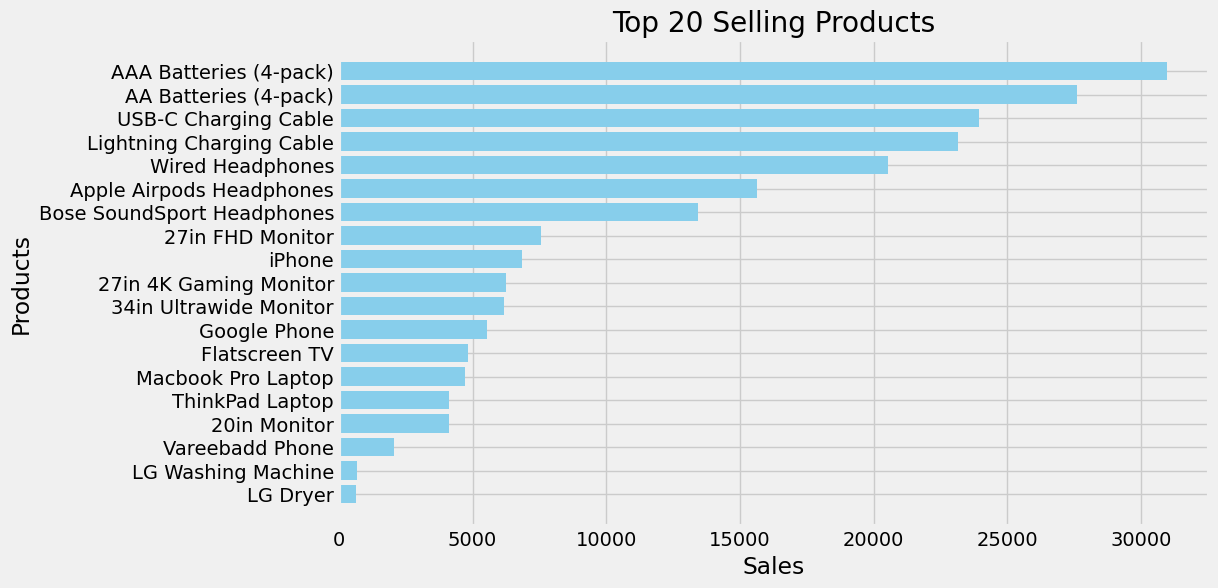

In [24]:
top_selling_products = (df.groupby('product')[['quantity_ordered', 'order_value']].agg('sum')
                        .sort_values(by= 'quantity_ordered' ,ascending=False))

products = top_selling_products.index[:20]
sales = top_selling_products['quantity_ordered'][:20]

plt.figure(figsize=(10, 6))
plt.barh(products, sales, color='skyblue')
plt.xlabel('Sales')
plt.ylabel('Products')
plt.title('Top 20 Selling Products')
plt.gca().invert_yaxis()
plt.show()


In [25]:
average_order_value = df.groupby('Order ID')[['order_value']].sum().mean()
average_order_value

order_value    193.152418
dtype: float64

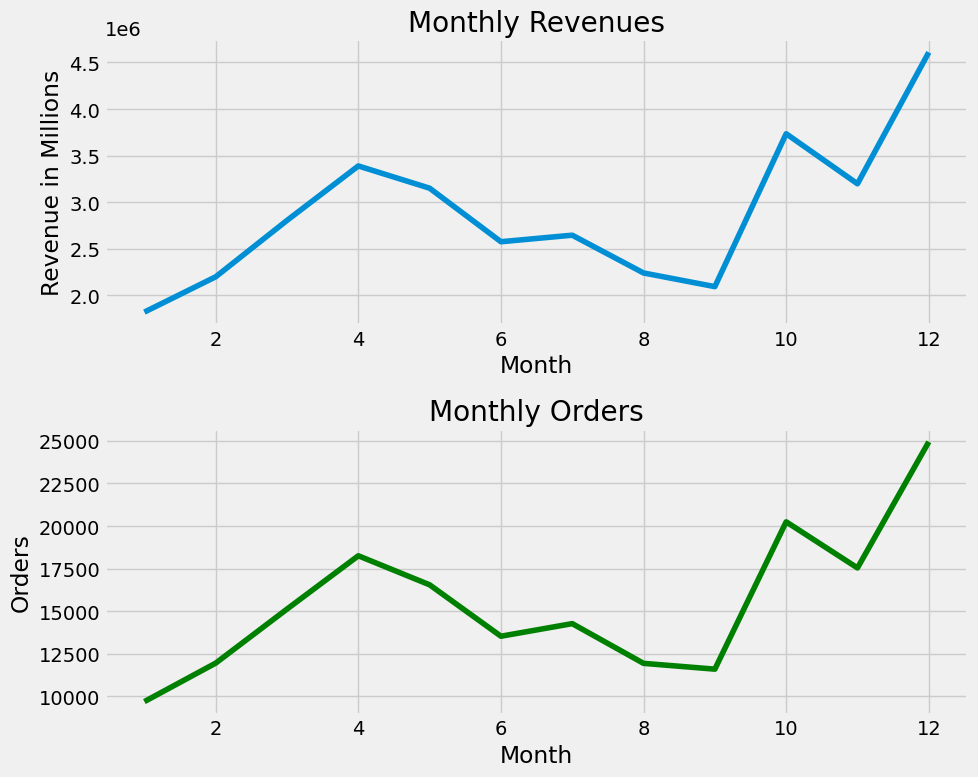

In [26]:
monthly_revenue = df.groupby(df['order_date'].dt.month)[['order_value']].sum()

df_reset = df.reset_index()  # Reset index to make 'Order ID' a column
monthly_orders = df_reset.groupby(df_reset['order_date'].dt.month)['Order ID'].count()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(monthly_revenue.index, monthly_revenue.values, label='Monthly Revenue')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Revenue in Millions')
ax[0].set_title('Monthly Revenues')


ax[1].plot(monthly_orders.index, monthly_orders.values, color='green', label='Monthly Sales')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Orders')
ax[1].set_title('Monthly Orders')

plt.tight_layout()
plt.show()

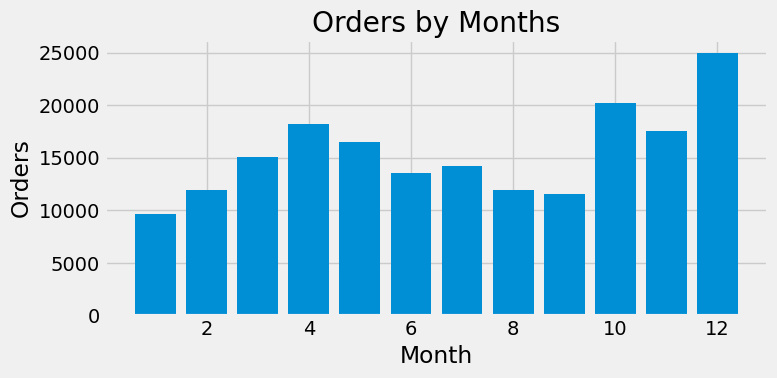

In [27]:
monthly_orders = df_reset.groupby(df_reset['order_date'].dt.month)['Order ID'].count()

plt.figure(figsize=(8, 4))
plt.bar(monthly_orders.index, monthly_orders.values)
plt.xlabel('Month')
plt.ylabel('Orders')
plt.title('Orders by Months')
plt.tight_layout()
plt.show()

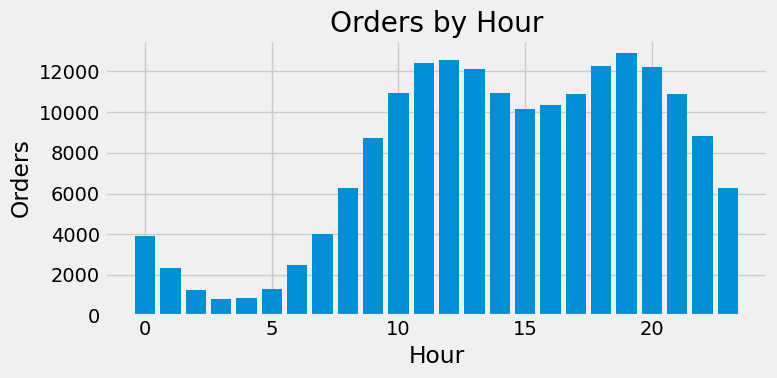

In [28]:
hourly_orders = df_reset.groupby(df_reset['order_date'].dt.hour)['Order ID'].count()

plt.figure(figsize=(8, 4))
plt.bar(hourly_orders.index, hourly_orders.values)
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.title('Orders by Hour')
plt.tight_layout()
plt.show()

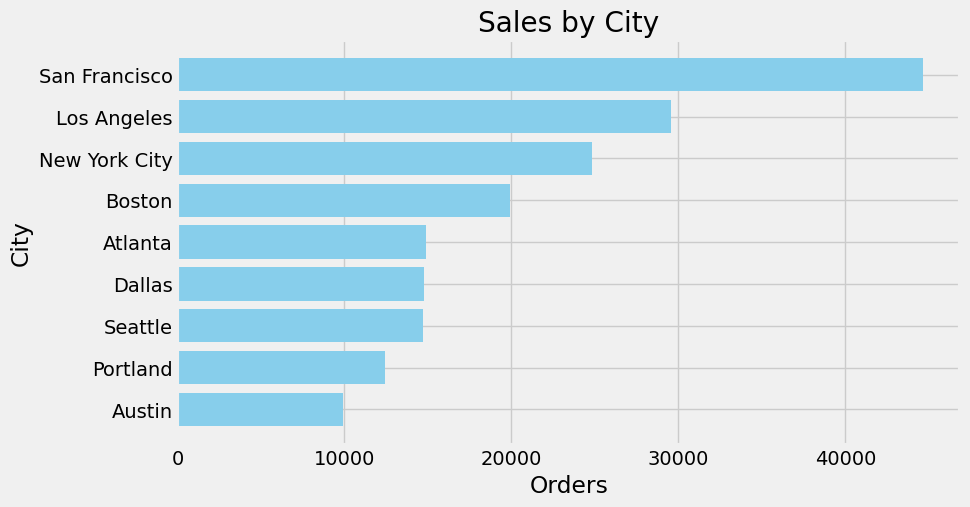

In [29]:
orders_by_city = df_reset.groupby('city')[['Order ID']].count().sort_values(by='Order ID', ascending=False)

plt.figure(figsize=(9, 5))
plt.barh(orders_by_city.index, orders_by_city.iloc[:, 0], color='skyblue')
plt.title("Sales by City")
plt.xlabel("Orders")
plt.ylabel("City")
plt.gca().invert_yaxis() 
plt.show()

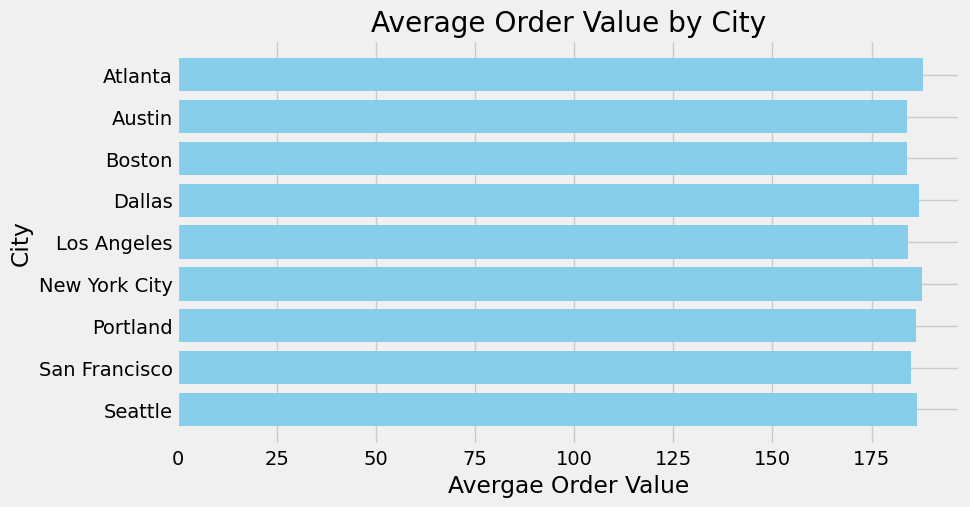

In [30]:
average_order_value_by_city = df_reset.groupby('city')['order_value'].sum() / df_reset.groupby('city')['Order ID'].count()

plt.figure(figsize=(9, 5))
plt.barh(average_order_value_by_city.index, average_order_value_by_city, color='skyblue')
plt.title("Average Order Value by City")
plt.xlabel("Avergae Order Value")
plt.ylabel("City")
plt.gca().invert_yaxis() 
plt.show()

In [31]:
high_demand_products_by_city = df.groupby(['city', 'product'], as_index=False)['quantity_ordered'].sum()
high_demand_products_by_city = high_demand_products_by_city.sort_values(by=['city', 'quantity_ordered'], ascending=[True, False])

print(high_demand_products_by_city)

        city                   product  quantity_ordered
5    Atlanta    AAA Batteries (4-pack)              2358
4    Atlanta     AA Batteries (4-pack)              2193
15   Atlanta      USB-C Charging Cable              1912
12   Atlanta  Lightning Charging Cable              1874
17   Atlanta          Wired Headphones              1576
..       ...                       ...               ...
166  Seattle           ThinkPad Laptop               332
152  Seattle              20in Monitor               324
168  Seattle           Vareebadd Phone               179
163  Seattle        LG Washing Machine                58
162  Seattle                  LG Dryer                56

[171 rows x 3 columns]


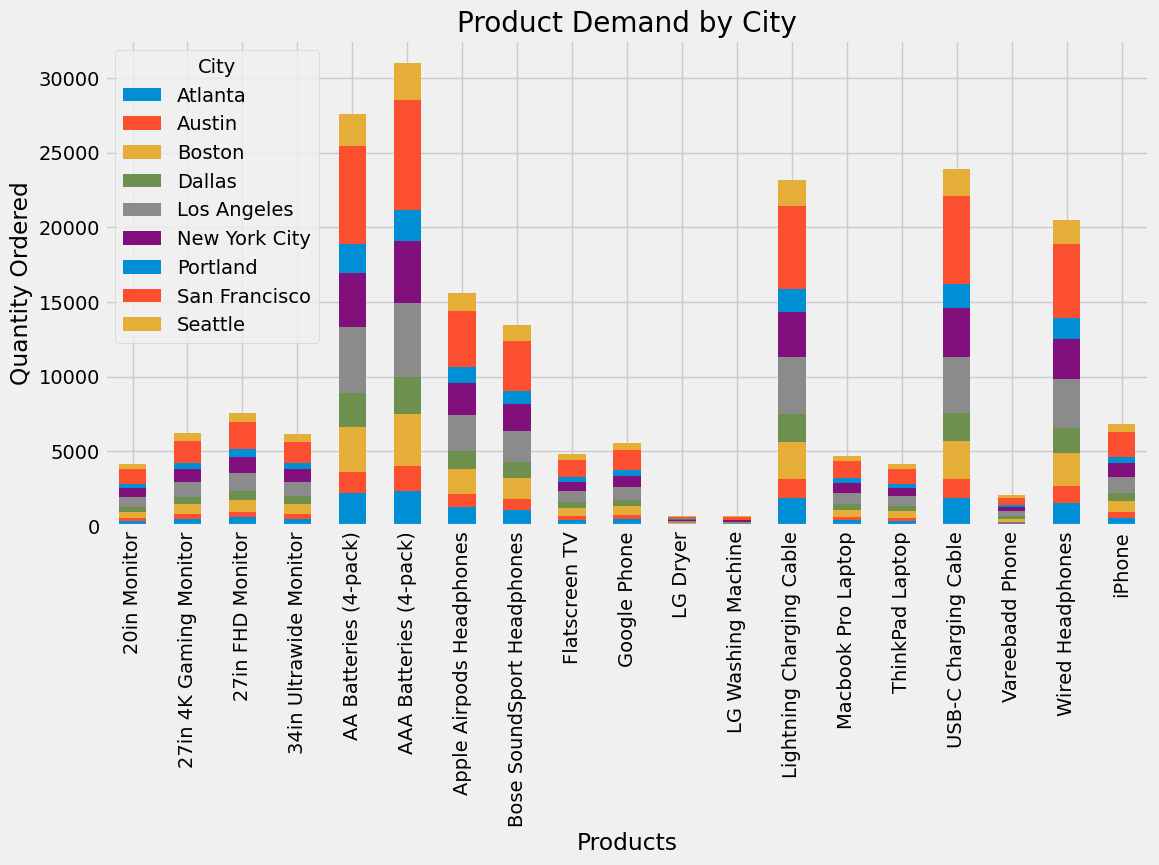

In [32]:
high_demand_products_by_city = df.groupby(['city', 'product'])['quantity_ordered'].sum().unstack() # Apply filters on this df is needed

high_demand_products_by_city.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Product Demand by City")
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.legend(title="City")
plt.show()